# 图像的算术运算
- 图像基本操作
- 图像运算

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## 图像基本操作

In [19]:
# 读取图像数据
img = cv.imread("./images/xiaoren.png")
print(img.shape)  # [H, W, C]

(600, 510, 3)


In [20]:
# 图像可视化
cv.imshow('image', img)

# 让图像暂停 delay 毫秒，当 delay 设置为 0 的时候，表示永远，当键盘任意输入的时候，结束暂停
cv.waitKey(0)
# 释放所有资源
cv.destroyAllWindows()

In [21]:
# 裁剪图像（从左上角开始）
img2 = img[:100, :300]

# 可视化
cv.imshow('image', img2)
cv.waitKey(0)
cv.destroyAllWindows()

#### 获取并修改图像中的像素点
- 我们可以通过行和列的坐标值获取该像素点的像素值。
- 对于BGR图像，它返回一个蓝，绿，红值的数组。
- 对于灰度图像，仅返回相应的强度值。使用相同的方法对像素值进行修改。
- NOTE: 如果需要可视化图像，需要注意：OpenCV 中是 BGR 图像，而 Matplotlib 中是 RGB 的图像。
- 读取图像并交换红蓝通道

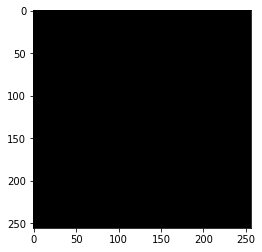

In [4]:
img = np.zeros((256, 256, 3), np.uint8)
plt.imshow(img[:, :, ::-1])

In [5]:
img[100, 100]

array([0, 0, 0], dtype=uint8)

In [6]:
img[100, 100, 0]

0

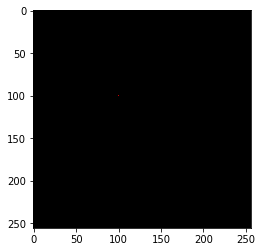

In [7]:
img[100, 100] = (0, 0, 255)
plt.imshow(img[:, :, ::-1])

In [8]:
img[100, 100]

array([  0,   0, 255], dtype=uint8)

In [22]:
# 访问图像的像素（不推荐）
# 第 1 个是第多少行，第 2 个是第多少列
img = cv.imread("./images/xiaoren.png")
px = img[250, 300]
print(f"位置(250, 300)对应的像素为：{px}")

blue = img[250, 300, 0]  # BGR
print(f"位置(250, 300)对应的像素的蓝色取值为：{blue}")

# 设置所有红色像素为 127（0~255）
img[:, :, 2] = 127
print(f"位置(250, 300)对应的像素为：{img[250, 300]}")

# 可视化
cv.imshow('image', img)
cv.waitKey(0)
cv.destroyAllWindows()

位置(250, 300)对应的像素为：[248 250 250]
位置(250, 300)对应的像素的蓝色取值为：248
位置(250, 300)对应的像素为：[248 250 127]


In [6]:
# 基于 Image 对象获取对应的像素值
print("位置(250, 300)对应的像素蓝色取值为：", img.item(250, 300, 0))

# 设置像素值
img.itemset((250, 300, 0), 100)
print("位置(250, 300)对应的像素新的蓝色取值为：", img.item(250, 300, 0))

位置(250, 300)对应的像素蓝色取值为： 248
位置(250, 300)对应的像素新的蓝色取值为： 100


In [37]:
# 加载图像
img = cv.imread("./images/xiaoren.png")

# 粘贴图像
box = img[0:95, 20:240]        # 截取的图
box2 = img[0:95, 280:500]      # 粘贴的位置
box2 = box2 * 0.8 + box * 0.2  # 叠加
img[0:95, 280:500] = box2      # 粘贴回去

# 可视化
cv.imshow('image', img)
cv.waitKey(0)
cv.destroyAllWindows()

#### 图像通道的拆分与合并
- 有时需要在B，G，R通道图像上单独工作。在这种情况下，需要将BGR图像分割为单个通道。或者在其他情况下，可能需要将这些单独的通道合并到BGR图像。你可以通过以下方式完成。

In [8]:
# c1, c2, c3 = cv.split(img)  # b, g, r
# 将原来的 r 当成新图像的中 b，将原来的 b 当成新图像中的 r
# img = cv.merge((c3, c2, c1))

In [38]:
b, g, r = cv.split(img)
# 将原来的 r 当成新图像的中 b，将原来的 b 当成新图像中的 r
img = cv.merge((r, g, b))

# 可视化
cv.imshow('image', img)
cv.waitKey(0)
cv.destroyAllWindows()

原图大小： (99, 82, 3)
添加边框后图大小： (119, 102, 3)


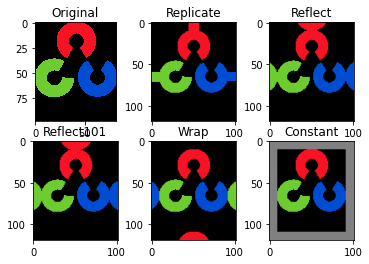

In [39]:
"""添加边框"""

# 读取图片
img = cv.imread('./images/opencv-logo.png')
print("原图大小：", img.shape)

# 开始添加边框
# 直接复制
replicate = cv.copyMakeBorder(img, top=10, bottom=10, left=10, right=10, borderType=cv.BORDER_REPLICATE)
print("添加边框后图大小：", replicate.shape)
# 边界反射
reflect = cv.copyMakeBorder(img, 10, 10, 10, 10, cv.BORDER_REFLECT)
# 边界反射 101（边界像素不保留）
reflect101 = cv.copyMakeBorder(img, 10, 10, 10, 10, cv.BORDER_REFLECT_101)
# 边界延伸循环
wrap = cv.copyMakeBorder(img, 10, 10, 10, 10, cv.BORDER_WRAP)
# 添加常数（常用）
# value=[128, 128, 128]：BGR 数值都相同时一般为灰色，其中[0, 0, 0]为黑色，[255, 255, 255]为白色
constant= cv.copyMakeBorder(img, 10, 10, 10, 10, cv.BORDER_CONSTANT, value=[128, 128, 128])

# 可视化
plt.subplot(231)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))         # 原图
plt.title("Original")
plt.subplot(232)
plt.imshow(cv.cvtColor(replicate, cv.COLOR_BGR2RGB))   # 复制
plt.title("Replicate")
plt.subplot(233)
plt.imshow(cv.cvtColor(reflect, cv.COLOR_BGR2RGB))     # 边界反射
plt.title("Reflect")
plt.subplot(234)
plt.imshow(cv.cvtColor(reflect101, cv.COLOR_BGR2RGB))  # 边界反射 101（边界像素不保留）
plt.title("Reflect101")
plt.subplot(235)
plt.imshow(cv.cvtColor(wrap, cv.COLOR_BGR2RGB))        # 边界延伸循环
plt.title("Wrap")
plt.subplot(236)
plt.imshow(cv.cvtColor(constant, cv.COLOR_BGR2RGB))    # 添加常数
plt.title("Constant")

plt.show()

In [40]:
# 添加边框
# 读取图片
img = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(3, 3)

# 开始添加边框
# 直接复制: 直接将边缘的像素点作为新增像素点的值
replicate = cv.copyMakeBorder(img, top=3, bottom=3, left=3, right=3, borderType=cv.BORDER_REPLICATE)
# 边界反射
reflect = cv.copyMakeBorder(img, 3, 3, 3, 3, cv.BORDER_REFLECT)
# 边界反射 101（边界像素不保留）
reflect101 = cv.copyMakeBorder(img, 3, 3, 3, 3, cv.BORDER_REFLECT_101)
# 边界延伸
wrap = cv.copyMakeBorder(img, 2, 2, 2, 2, cv.BORDER_WRAP)
# 添加常数
constant= cv.copyMakeBorder(img, 2, 2, 2, 2, cv.BORDER_CONSTANT, value=0)

print("原图：\n", img, sep="")
print("\n直接复制，直接将边缘的像素点作为新增像素点的值：\n", replicate, sep="")
print("\n边界反射：\n", reflect, sep="")
print("\n边界反射(101)，边界像素不保留：\n", reflect101, sep="")
print("\n边界延伸：\n", wrap, sep="")
print("\n添加常数：\n", constant, sep="")

原图：
[[1 2 3]
 [4 5 6]
 [7 8 9]]

直接复制，直接将边缘的像素点作为新增像素点的值：
[[1 1 1 1 2 3 3 3 3]
 [1 1 1 1 2 3 3 3 3]
 [1 1 1 1 2 3 3 3 3]
 [1 1 1 1 2 3 3 3 3]
 [4 4 4 4 5 6 6 6 6]
 [7 7 7 7 8 9 9 9 9]
 [7 7 7 7 8 9 9 9 9]
 [7 7 7 7 8 9 9 9 9]
 [7 7 7 7 8 9 9 9 9]]

边界反射：
[[9 8 7 7 8 9 9 8 7]
 [6 5 4 4 5 6 6 5 4]
 [3 2 1 1 2 3 3 2 1]
 [3 2 1 1 2 3 3 2 1]
 [6 5 4 4 5 6 6 5 4]
 [9 8 7 7 8 9 9 8 7]
 [9 8 7 7 8 9 9 8 7]
 [6 5 4 4 5 6 6 5 4]
 [3 2 1 1 2 3 3 2 1]]

边界反射(101)，边界像素不保留：
[[5 6 5 4 5 6 5 4 5]
 [8 9 8 7 8 9 8 7 8]
 [5 6 5 4 5 6 5 4 5]
 [2 3 2 1 2 3 2 1 2]
 [5 6 5 4 5 6 5 4 5]
 [8 9 8 7 8 9 8 7 8]
 [5 6 5 4 5 6 5 4 5]
 [2 3 2 1 2 3 2 1 2]
 [5 6 5 4 5 6 5 4 5]]

边界延伸：
[[5 6 4 5 6 4 5]
 [8 9 7 8 9 7 8]
 [2 3 1 2 3 1 2]
 [5 6 4 5 6 4 5]
 [8 9 7 8 9 7 8]
 [2 3 1 2 3 1 2]
 [5 6 4 5 6 4 5]]

添加常数：
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 2 3 0 0]
 [0 0 4 5 6 0 0]
 [0 0 7 8 9 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


In [12]:
# 图有 6 个通道
img = np.array(np.arange(0, 54)).reshape((3, 3, 6))
print("原图：\n", img, sep="")

# 添加边框
# 直接复制: 直接将边缘的像素点作为新增像素点的值
img2 = cv.copyMakeBorder(img, top=3, bottom=3, left=3, right=3, borderType=cv.BORDER_REPLICATE)
print("\n带框图的形状（0轴和1轴分别增加了3x2=6个像素）：\n", img2.shape, sep="")
print("\n原图换轴后（每个矩阵是一个通道）：\n", np.transpose(img, (2, 0, 1)), sep="")
print("\n带框图换轴后（每个矩阵是一个通道）：\n", np.transpose(img2, (2, 0, 1)), sep="")

原图：
[[[ 0  1  2  3  4  5]
  [ 6  7  8  9 10 11]
  [12 13 14 15 16 17]]

 [[18 19 20 21 22 23]
  [24 25 26 27 28 29]
  [30 31 32 33 34 35]]

 [[36 37 38 39 40 41]
  [42 43 44 45 46 47]
  [48 49 50 51 52 53]]]

带框图的形状（0轴和1轴分别增加了3x2=6个像素）：
(9, 9, 6)

原图换轴后（每个矩阵是一个通道）：
[[[ 0  6 12]
  [18 24 30]
  [36 42 48]]

 [[ 1  7 13]
  [19 25 31]
  [37 43 49]]

 [[ 2  8 14]
  [20 26 32]
  [38 44 50]]

 [[ 3  9 15]
  [21 27 33]
  [39 45 51]]

 [[ 4 10 16]
  [22 28 34]
  [40 46 52]]

 [[ 5 11 17]
  [23 29 35]
  [41 47 53]]]

带框图换轴后（每个矩阵是一个通道）：
[[[ 0  0  0  0  6 12 12 12 12]
  [ 0  0  0  0  6 12 12 12 12]
  [ 0  0  0  0  6 12 12 12 12]
  [ 0  0  0  0  6 12 12 12 12]
  [18 18 18 18 24 30 30 30 30]
  [36 36 36 36 42 48 48 48 48]
  [36 36 36 36 42 48 48 48 48]
  [36 36 36 36 42 48 48 48 48]
  [36 36 36 36 42 48 48 48 48]]

 [[ 1  1  1  1  7 13 13 13 13]
  [ 1  1  1  1  7 13 13 13 13]
  [ 1  1  1  1  7 13 13 13 13]
  [ 1  1  1  1  7 13 13 13 13]
  [19 19 19 19 25 31 31 31 31]
  [37 37 37 37 43 49 49 49 49]
 

## 图像运算

In [13]:
"""图像合并"""

# 加载图像
img1 = cv.imread("./images/xiaoren.png")
img2 = cv.imread("./images/opencv-logo.png")

# 设置为相同大小
# dsize=(300, 300)：目标尺寸 (width, height)
img1 = cv.resize(img1, dsize=(300, 300))
img2 = cv.resize(img2, dsize=(300, 300))

# 添加背景
# 使用.addWeighted() 函数对两张图像进行加权融合
# 计算公式：dst = alpha * src1 + beta * src2 + gamma
# dst = cv.addWeighted(src1=img1, alpha=0.3, src2=img2, beta=1.0, gamma=0)
# print(dst)

# 下面的结果类似 cv.addWeighted()，差别：前者是 float 类型，后者是 int 类型
dst = 0.3 * img1 + 1.0 * img2 + 0
# dst / 255.0：归一化操作，将原本 0-255 范围的像素值转换为 0.0 - 1.0 范围的浮点数
# .clip(0.0, 1.0)：剪切，将所有小于 0.0 的值设为 0.0，大于 1.0 的值设为 1.0
dst = (dst / 255.0).clip(0.0, 1.0)  
print(dst)

# 可视化
cv.imshow('image', dst)
cv.waitKey(0)
cv.destroyAllWindows()

[[[0.3 0.3 0.3]
  [0.3 0.3 0.3]
  [0.3 0.3 0.3]
  ...
  [0.3 0.3 0.3]
  [0.3 0.3 0.3]
  [0.3 0.3 0.3]]

 [[0.3 0.3 0.3]
  [0.3 0.3 0.3]
  [0.3 0.3 0.3]
  ...
  [0.3 0.3 0.3]
  [0.3 0.3 0.3]
  [0.3 0.3 0.3]]

 [[0.3 0.3 0.3]
  [0.3 0.3 0.3]
  [0.3 0.3 0.3]
  ...
  [0.3 0.3 0.3]
  [0.3 0.3 0.3]
  [0.3 0.3 0.3]]

 ...

 [[0.3 0.3 0.3]
  [0.3 0.3 0.3]
  [0.3 0.3 0.3]
  ...
  [0.3 0.3 0.3]
  [0.3 0.3 0.3]
  [0.3 0.3 0.3]]

 [[0.3 0.3 0.3]
  [0.3 0.3 0.3]
  [0.3 0.3 0.3]
  ...
  [0.3 0.3 0.3]
  [0.3 0.3 0.3]
  [0.3 0.3 0.3]]

 [[0.3 0.3 0.3]
  [0.3 0.3 0.3]
  [0.3 0.3 0.3]
  ...
  [0.3 0.3 0.3]
  [0.3 0.3 0.3]
  [0.3 0.3 0.3]]]


In [14]:
# 加权融合
a = img1 * 0.3 + img2 * 1.0
print("最大值：", np.max(a))

# 归一化
a = np.clip(a, a_min=0, a_max=255).astype(np.uint8)
print("数据类型：", a.dtype)

# 图像可视化
cv.imshow('image', a)
cv.waitKey(0)
cv.destroyAllWindows()

最大值： 323.5
数据类型： uint8


In [15]:
# 加载图像
img2 = cv.imread("./images/opencv-logo.png")

# 将图像转换为灰度图
img2gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

# 二值化操作：将输入图像（灰度图像）中所有像素值大于第 2 个参数的全部设置为第 3 个参数值
ret, mask = cv.threshold(src=img2gray, thresh=10, maxval=255, type=cv.THRESH_BINARY)
# print(ret)  # 阈值：10.0
mask_inv = cv.bitwise_not(mask)  # 求反

# 可视化
cv.imshow('img2', img2)          # 原图
cv.imshow('img2gray', img2gray)  # 灰度图
cv.imshow('mask', mask)          # 黑白图，掩膜 mask
cv.imshow('mask_inv', mask_inv)  # 黑白反转图

cv.waitKey(0)
cv.destroyAllWindows()

In [16]:
"""图像的位运算（将 logo 放到图像的中上方）"""

# 加载图像
img1 = cv.imread("./images/xiaoren.png")
img2 = cv.imread("./images/opencv-logo.png")

# 获取一个新数据（右上角区域数据）
rows1, cols1, _ = img1.shape                          # img1 的行数、列数
rows, cols, channels = img2.shape                     # img2 的行数、列数、通道
start_rows = 50                                       # 开始行
end_rows = rows + 50                                  # 结束行 = img2的行数 + 50
start_cols = cols1 - cols - 200                       # 开始列 = img1的列数 - 200 - img2的列数
end_cols = cols1 - 200                                # 结束列 = img1的列数 - 200
roi = img1[start_rows:end_rows, start_cols:end_cols]  # img1 的区域数据 [开始行:结束行, 开始列:结束列]

# 画红色矩形
# 点坐标的形状为: [宽度，高度]
cv.rectangle(img1, pt1=(start_cols, start_rows), pt2=(end_cols, end_rows), color=(0, 0, 255), thickness=2)

# 将图像转换为灰度图像
img2gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
# 将灰度图像转换为黑白图像，做一个二值化操作
ret, mask = cv.threshold(img2gray, 10, 255, cv.THRESH_BINARY)
# 对图像做一个求反的操作，即 255-mask(白底、黑图像)
mask_inv = cv.bitwise_not(mask)
print(mask_inv)

# 获取得到背景图
# 对两个相同尺寸的图像进行按位与运算，并应用反向掩膜控制操作区域
# 在求解 bitwise_and 操作的时候，如果给定 mask，只对 mask 中对应为白色的位置进行 and 操作，其它位置直接设置为 0
img1_bg = cv.bitwise_and(roi, roi, mask=mask_inv)

# 获取得到前景图
img2_fg = cv.bitwise_and(img2, img2, mask=mask)

# 前景颜色和背景颜色合并
dst = cv.add(img1_bg, img2_fg)
# dst = img1_bg + img2_fg  # 同上

# 复制粘贴
img1[start_rows:end_rows, start_cols:end_cols] = dst

# 可视化
cv.imshow('mask_inv', mask_inv)  # 反向掩膜
cv.imshow('img1_bg', img1_bg)    # 提取背景
cv.imshow('mask', mask)          # 掩膜
cv.imshow('img2_fg', img2_fg)    # 提取前景
cv.imshow('dst', dst)            # 前景和背景合并
cv.imshow('res', img1)           # 叠加 Logo
cv.waitKey(0)
cv.destroyAllWindows()

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
